# 使用多项式回归拟合正弦函数（Pipeline）

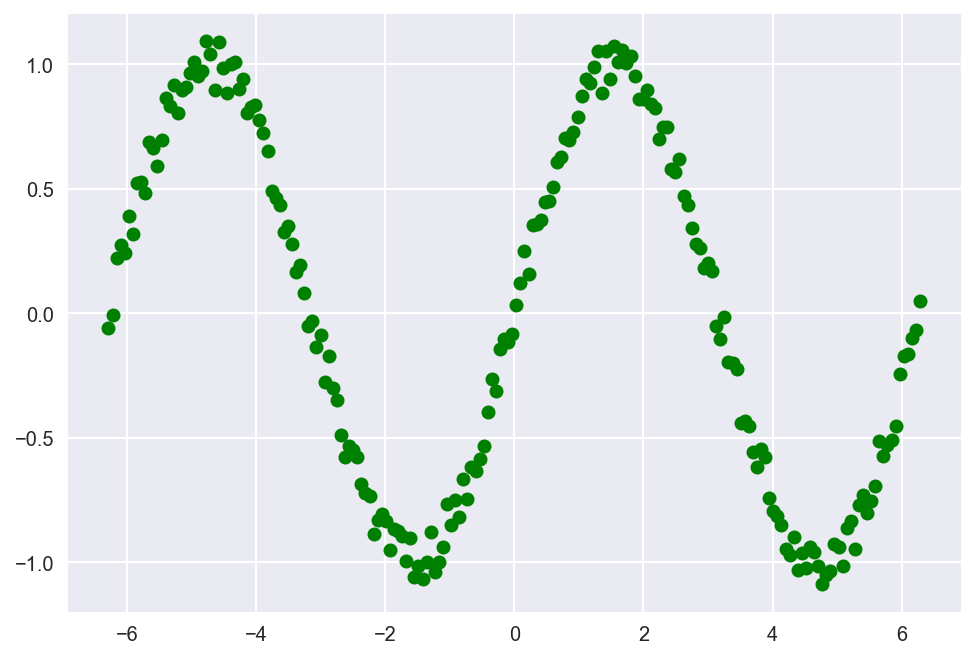

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()

n_dots = 200

X = np.linspace(-2 * np.pi, 2 * np.pi, n_dots)
Y = np.sin(X) + 0.2 * np.random.rand(n_dots) - 0.1
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

plt.plot(X, Y, 'go')
plt.show()

## 使用多项式回归（掌握 PolynomialFeatures、Pipeline 的用法）

## 多项式回归 = 构造多项式特征 + 线性回归

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

def polynomial_features(degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    return pipeline

In [6]:
# 候选多项式阶数
degrees = [2, 3, 4, 5, 6, 7, 8, 9]

results = []

plt.figure(dpi=100)
for d in degrees:
    model = polynomial_features(degree=d)

    model.fit(X, Y)

    train_score = model.score(X, Y)

    y_pred = model.predict(X)

    mse = mean_squared_error(Y, y_pred)
    results.append({"model": model, "degree": d, "score": train_score, "mse": mse})

<Figure size 800x550 with 0 Axes>

In [8]:
pd.DataFrame(results)

,degree,model,mse,score
0,2,"Pipeline(memory=None,\n steps=[('polynomia...",0.426702,0.154213
1,3,"Pipeline(memory=None,\n steps=[('polynomia...",0.364716,0.277077
2,4,"Pipeline(memory=None,\n steps=[('polynomia...",0.364709,0.277092
3,5,"Pipeline(memory=None,\n steps=[('polynomia...",0.049477,0.901930
4,6,"Pipeline(memory=None,\n steps=[('polynomia...",0.049466,0.901950
5,7,"Pipeline(memory=None,\n steps=[('polynomia...",0.004979,0.990131
6,8,"Pipeline(memory=None,\n steps=[('polynomia...",0.004973,0.990143
7,9,"Pipeline(memory=None,\n steps=[('polynomia...",0.003284,0.993491


In [7]:
for r in results:
    print(r)

{'model': Pipeline(memory=None,
     steps=[('polynomial_features', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]), 'degree': 2, 'score': 0.15421250541803067, 'mse': 0.42670150913272054}
{'model': Pipeline(memory=None,
     steps=[('polynomial_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]), 'degree': 3, 'score': 0.27707671370937836, 'mse': 0.36471626646579425}
{'model': Pipeline(memory=None,
     steps=[('polynomial_features', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]), 'degree': 4, 'score': 0.2770919214580111, 'mse': 0.3647085941257163}
{'model': Pipeline(memory=None,
     steps=[('polynomi

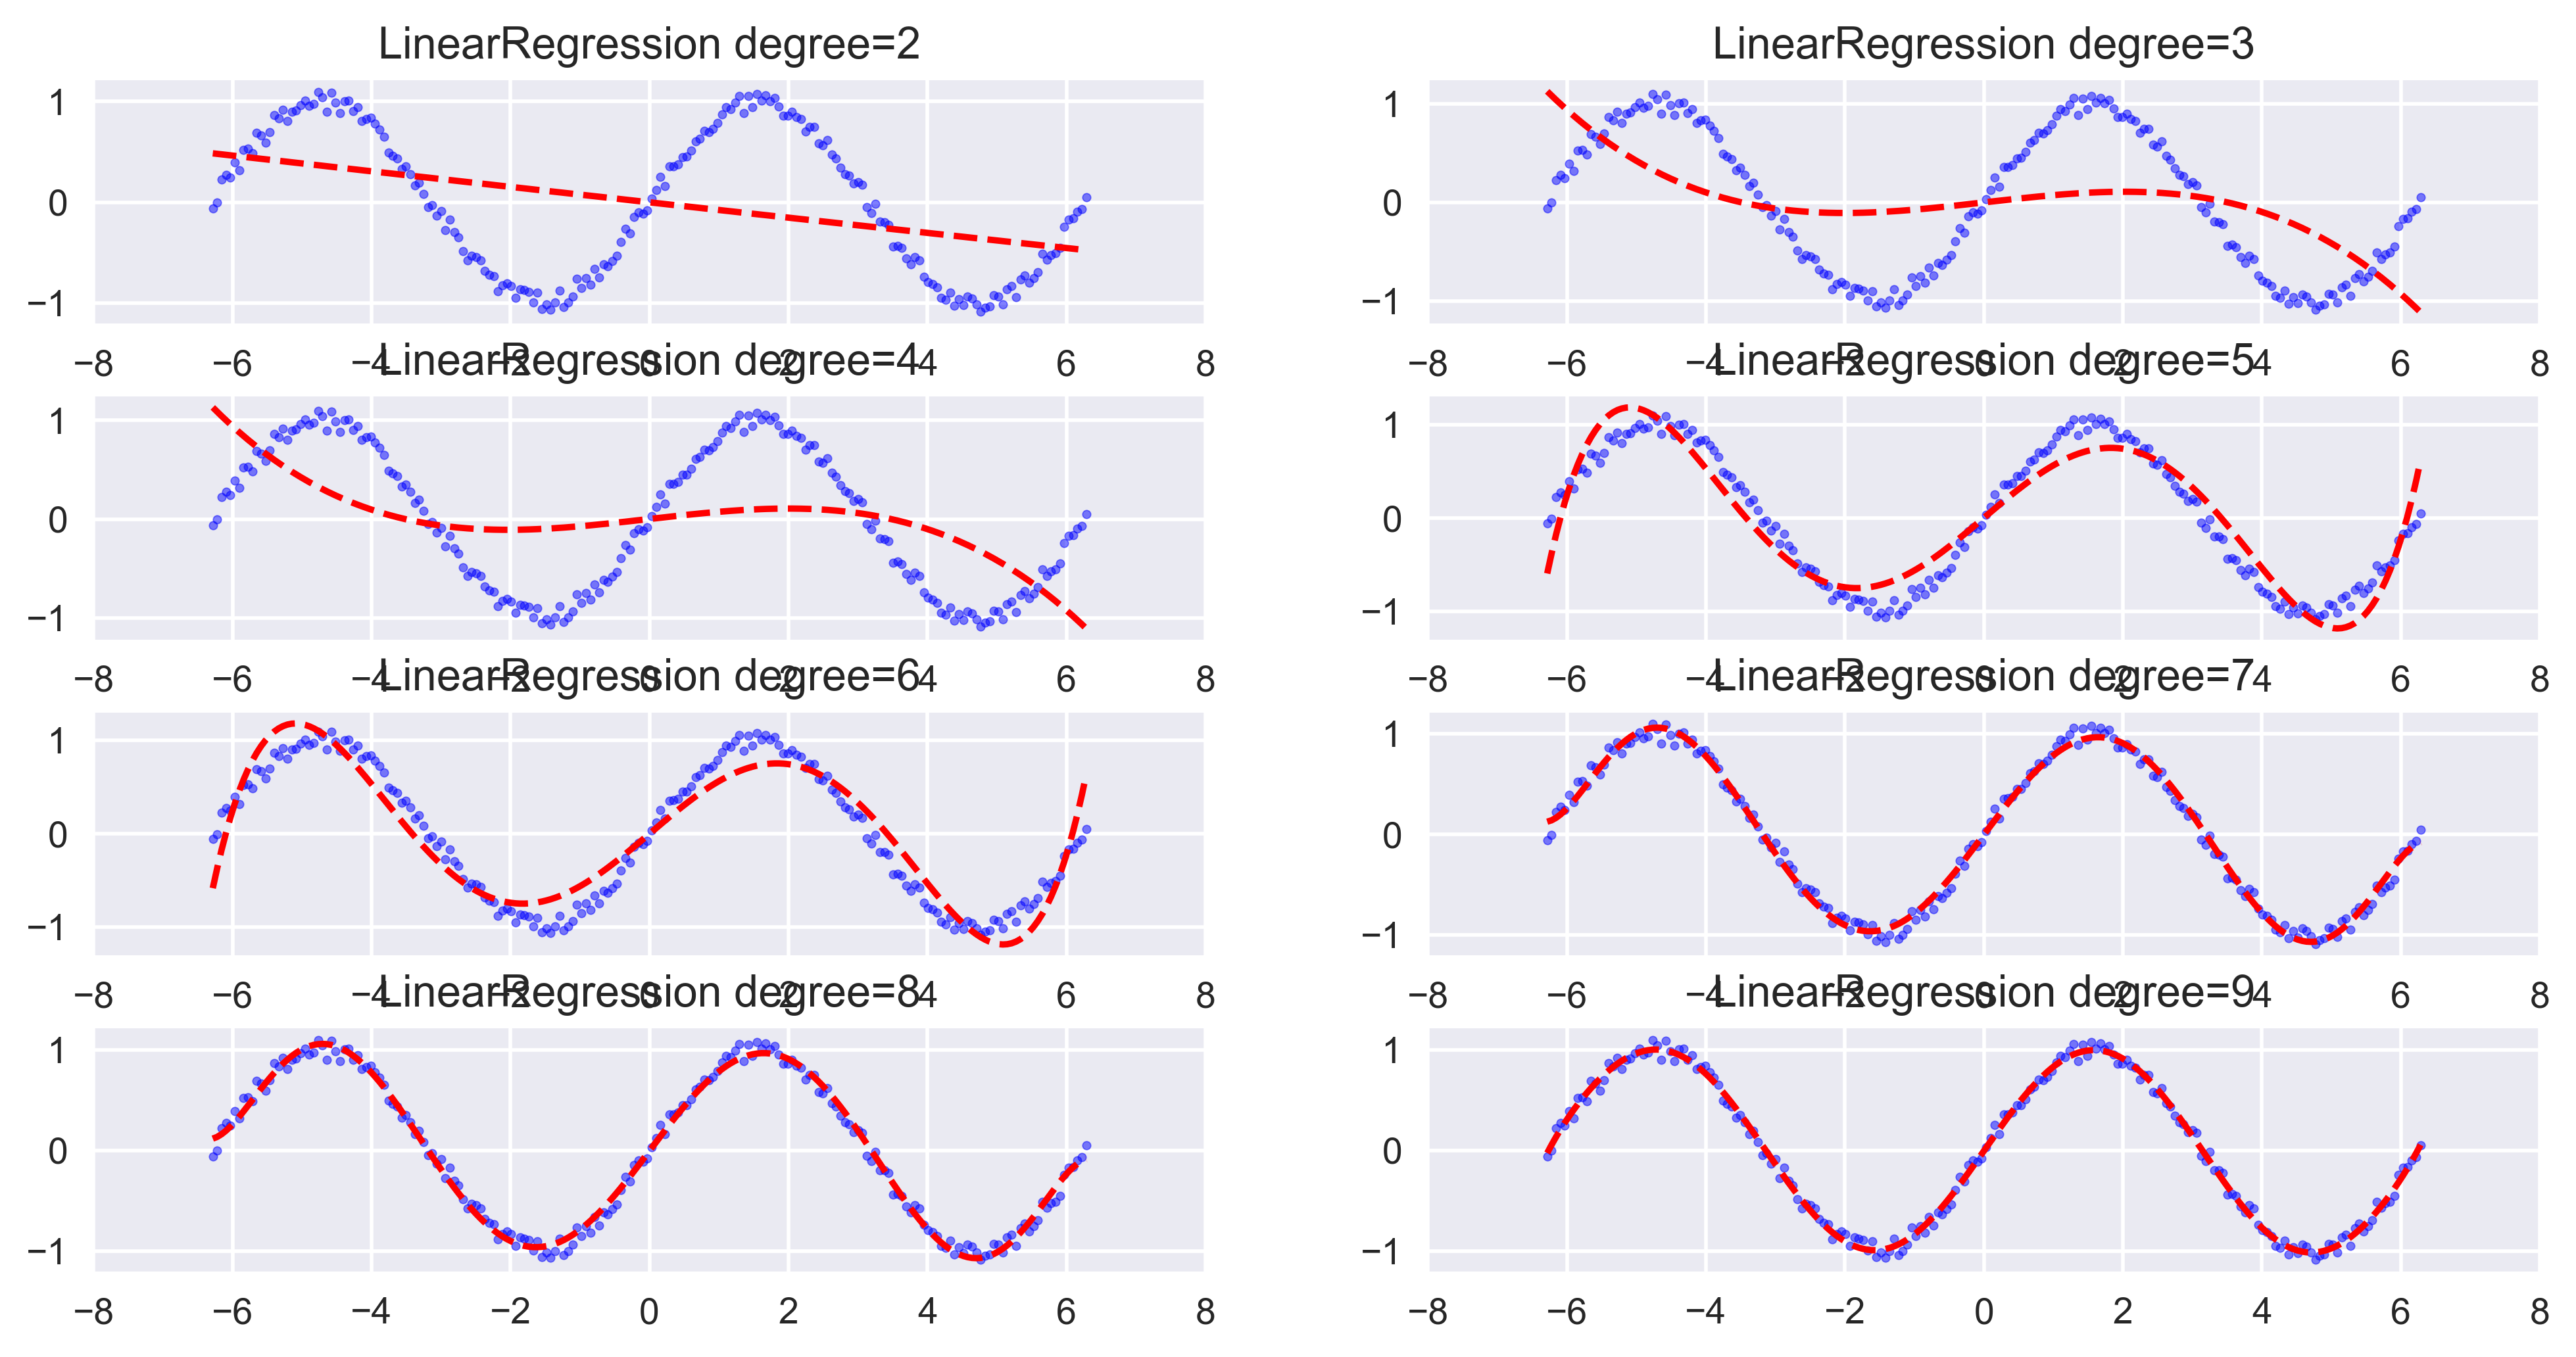

In [9]:
from matplotlib.figure import SubplotParams

# 下面开始绘图
plt.figure(figsize=(12, 6), dpi=200, subplotpars=SubplotParams(hspace=0.3))

for i, r in enumerate(results):
    fig = plt.subplot(4, 2, i + 1)
    plt.xlim(-8, 8)
    plt.title("LinearRegression degree={}".format(r['degree']))
    plt.scatter(X, Y, s=5, c='b', alpha=0.5)
    plt.plot(X, r["model"].predict(X), 'r--')
plt.show()